# Data Travel Insurance
### Ditulis oleh : Dwi Satrio Nurseto

**Pendahuluan :**  
Sebuah perusahaan yang bergerak di bidang `Asuransi Perjalanan International` ingin menawarkan produk asuransi kepada calon nasabah. Namun perusahaan ingin mengetahui nasabah mana yang berpotensi akan mengajukan Claim (mengalami resiko yang akan ditanggung perusahaan) dan yang tidak. Dilain sisi perusahaan juga ingin menekan biaya marketing (diskon yang diberikan) dikarenakan setengah dari calon nasabah diasumsikan tidak akan Claim dan setengah lagi diasumsikan bakal Claim.

Untuk setengah calon nasabah yang tidak akan Claim diberikan harga khusus (diskon) dan calon nasabah yang diasumsikan bakal Claim akan dikenakan biaya penuh.

Target :
- 0 : (tidak Claim) Diberi harga potongan
- 1 : (Claim) Diberi harga normal / lebih

**Pernyataan masalah :**

Pemberian diskon kepada calon nasabah secara acak menyebabkan tidak tepat sasaran. Kemungkinan terburuk yang terjadi adalah calon nasabah yang melakukan Claim namun mendapatkan diskon/potongan premi. Hal ini dapat berakibat fatal pada pendapatan Perusahaan Asuransi, dimana kas yang diterima perusahaan lebih kecil dari pengeluaran (yang disebabkan oleh resiko yang ditanggung / Claim).
Jika hal tersebut terjadi secara terus menerus, maka sebuah perusahaan asuransi akan tutup.


**Tujuan Pembuatan Model:**

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan suatu nasabah akan mengajukan Claim atau tidak. Sehingga selain dapat memberikan harga yang bersahabat kepada nasabah yang diprediksi tidak akan Claim dengan harapan menjadi nasabah setia, dan kita dapat meminimalisir terjadinya kerugian yang diakibatkan nasabah yang mengajukan Claim.

Dan perusahaan juga ingin mengetahui faktor apa yang membuat calon nasabah ingin mengajukan Claim atau tidak. Dengan begitu perusahaan bisa menyiapkan premi yang lebih tinggi agar perusahaan mendapatkan keuntungan juga.


**Proses Pendekatan :**

Untuk mengatasi hal ini, penulis ingin melakukan pembuatan Machine Learning yang dapat memprediksi suatu calon nasabah asuransi dengan data yang sudah ada. Dengan tujuan agar perusahaan dapat memberikan harga/premi yang tepat kepada calon nasabah asuransi. Machine Learning yang akan dihasilkan adalah Supervised Machine Learning beserta faktor apa yang berpengaruh terhadap target (Claim atau tidak)

<img src='Confusion_matrix.png'>

Type 1 error : False Positive (FP) 

Konsekuensi: `Dengan menawarkan harga lebih` kepada nasabah yang aktualnya tidak Claim membuat nasabah merasa terberatkan
- Implementasi kasus: Menawarkan produk asuransi diharga normal/lebih dikarenakan diprediksi akan mengajukan Claim

Type 2 error : False Negative (FN)

Konsekuensi: `Berkurangnya pendapatan perusahaan` asuransi dikarenakan Claim dan `terbuang sia-sianya Biaya Marketing` seperti diskon/potongan harga.
- Implementasi kasus: Terjadi pengajuan Claim pada nasabah yang diprediksi tidak akan mengajukan Claim dan biaya yang dikeluarkan perusahaan dua kali lipatnya dari premi yang dibayarkan nasabah

Berdasarkan konsekuensinya, False Negative lebih merugikan perusahaan dimana setiap 1 orang yang salah diprediksi, mengurangi pendapatan perusahaan sebanyak 2 premi nasabah atau bahkan lebih. Sebaliknya untuk kasus False Positive dapat disiasati dengan penambahan biaya. Hal ini dapat dilakukan jika Machine Learning mendeteksi bahwa terdapat faktor-faktor utama pada saat prediksi yang nantinya dapat dilihat setelah model berhasil dibuat.

Sehingga penulis memutuskan untuk memilih metric yang akan digunakan adalah `Recall`.

<img src='accuracy_precision_recall.png'>

Mengenai data set
A third-party travel insurance servicing company that is based in Singapore.

The attributes:

1. Nama agen asuransi (`Agency`)
2. Tipe agen asuransi (`Agency Type`)
3. Proses pembelian dari agen asuransi (`Distribution Channel`)
4. Nama produk asuransi (`Product Name`)
5. Jenis kelamin nasabah/tertanggung (`Gender`)
6. Durasi perjalanan tertanggung (`Duration`)
7. Destinasi perjalanan tertanggung (`Destination`)
8. Pendapatan bersih dari penjualan polis asuransi (`Net Sales`)
9. Komisi yang diberikan kepada agen asuransi (`Commission (in value)`)
10. Umur dari tertanggung (`Age`)
11. `Target:` Status Pencairan Dana (`Claim`)

Data set ini diperoleh dari Purwadhika yang bersumber pada [Kaggle](https://www.kaggle.com/datasets/mhdzahier/travel-insurance)

Pembuat data set adalah Zahier Nasrudin pada 4 tahun yang lalu

In [2]:
# import Numpy, Pandas, dan Plotter Grafik
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

## Memuat Data Set dan EDA Singkat

In [3]:
# Set max columns
pd.set_option('display.max_columns', None)

# Membaca data
df = pd.read_csv('data_travel_insurance.csv')
df

# Berikut 5 baris teratas dan terbawah dari dataset data_travel_insurance.

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [4]:
# Merubah kolom 'Claim' (target kita) menjadi nilai 0 untuk tidak Claim dan 1 untuk yang Claim
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)

In [5]:
# melihat kolom 'Claim' sudah berubah
df.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,0


In [6]:
# Melihat jumlah baris tiap kolom dan tipe datanya
df.info()

# ternyata ada data kosong pada kolom 'Gender'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 3.6+ MB


### Data Unik dari Setiap Kolom beserta Data Kosong

In [7]:
# Melihat unique value dari tiap kolom
# pengaturan display lebar kolom maksimal
pd.set_option('display.max_colwidth', 1)

# Melihat persentase data kosong pada kolom tertentu beserta jumlah data unik dan nilai datanya
listItem = []
for kolom in df.columns :
    listItem.append([kolom, df[kolom].dtype, df[kolom].isna().sum(), round((df[kolom].isna().sum()/len(df[kolom])) * 100,2),
                    df[kolom].nunique(), list(df[kolom].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['features', 'data_type', 'n_NaN', 'NaN_percentage', 'n_unique', 'unique_value'],
                     data=listItem)
dfDesc
# note: n_Nan = jumlah baris nilai NaN dan n_unique = jumlah nilai unik

,features,data_type,n_NaN,NaN_percentage,n_unique,unique_value
0,Agency,object,0,0.00,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,object,31647,71.39,2,"[F, nan, M]"
5,Duration,int64,0,0.00,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,object,0,0.00,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,float64,0,0.00,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),float64,0,0.00,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,int64,0,0.00,89,"[57, 33, 26, 59,

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library missingno

dengan referensi : 

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

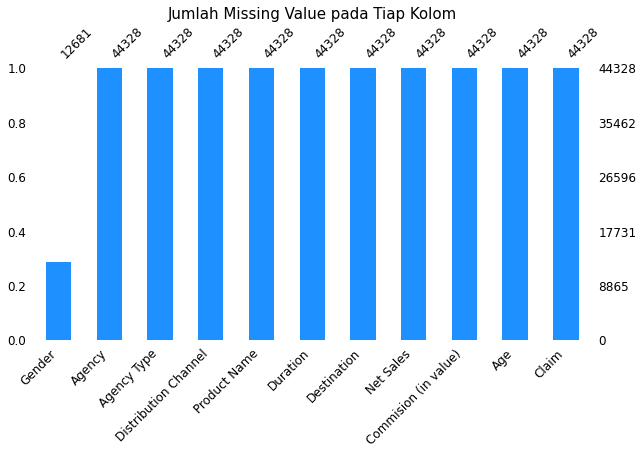

In [8]:
# Melihat jumlah missing value pada tiap kolom
import missingno
plt.title('Jumlah Missing Value pada Tiap Kolom', fontsize=15)
# Penulis menggambarkannya dalam bentuk Barplot
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

# Kolom Gender hanya terisi sebanyak 25% saja

Missingno Dendrogram digunakan untuk melihat suatu baris dari kolom data kosong berkorelasi dengan kolom lainnya

Pada kasus ini kolom Gender berkorelasi dengan kolom Age saja

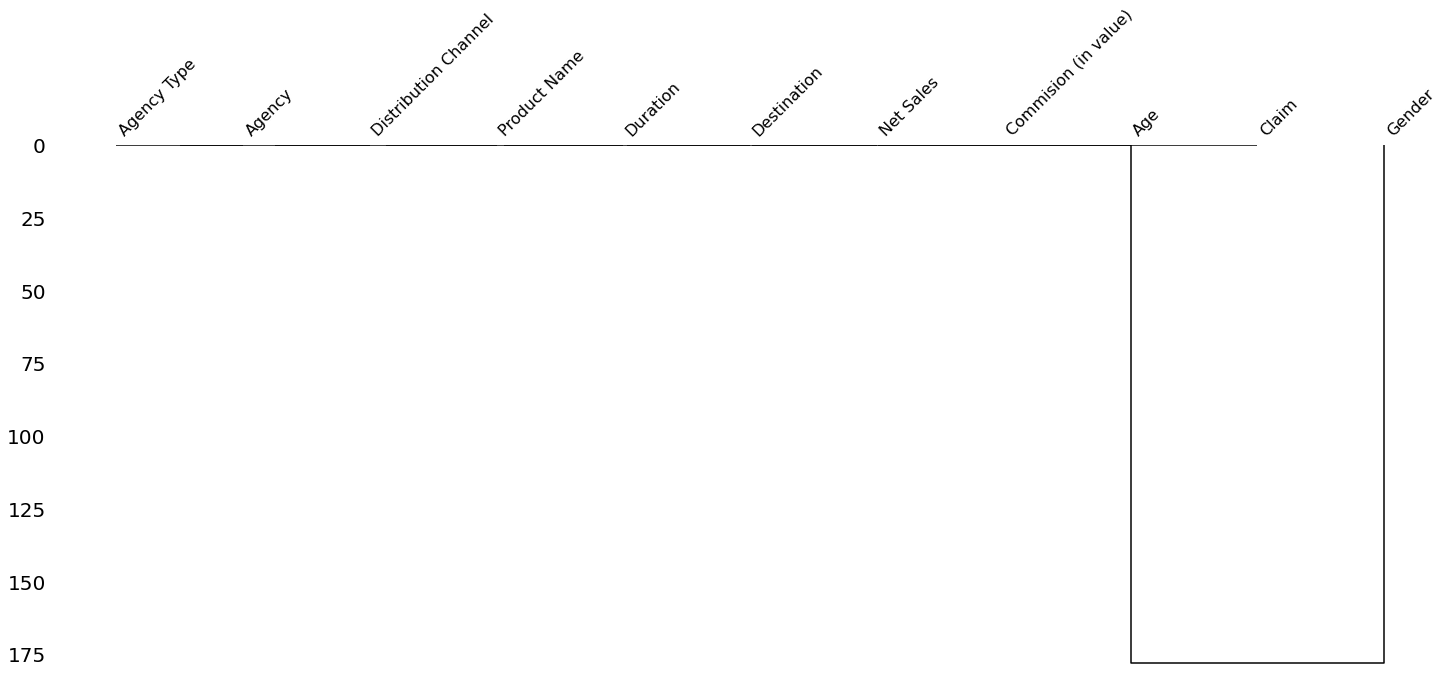

In [9]:
missingno.dendrogram(df)
plt.show()

In [10]:
# melihat kolom Gender kosong pada rentang usia berapa saja
pd.DataFrame({
    'rentang_usia':['10-19 tahun', '20-29 tahun', '30-39 tahun', '40-49 tahun', '50 tahun keatas'],
    'jumlah_NaN':[
        df[(df['Age']>=10) & (df['Age']<20)]['Gender'].isna().sum(),
        df[(df['Age']>=20) & (df['Age']<30)]['Gender'].isna().sum(),
        df[(df['Age']>=30) & (df['Age']<40)]['Gender'].isna().sum(),
        df[(df['Age']>=40) & (df['Age']<50)]['Gender'].isna().sum(),
        df[(df['Age']>=50)]['Gender'].isna().sum(),
    ]
})

,rentang_usia,jumlah_NaN
0,10-19 tahun,26
1,20-29 tahun,2768
2,30-39 tahun,22059
3,40-49 tahun,3763
4,50 tahun keatas,3031


> Terlihat pola bahwa orang yang berusia pada rentang 30-39 tahun memilih untuk tidak menunjukkan 'Gender'-nya, walaupun begitu dikarenakan pada dendrogram missingno yang dapat menjelaskan bahwa kekosongan kolom 'Gender' disebabkan oleh kolom usia saja, penulis memutuskan untuk tidak akan mengisinya dikarenakan kurangnya variabel yang dapat menunjang pengisian kekosongan kolom pada data tersebut

> Sehingga `penulis memutuskan` untuk **`membuang`** kolom 'Gender' dengan harapan akurasi model dapat meningkat

In [11]:
# Membuang kolom 'Gender' berdasarkan alasan diatas
df.drop(['Gender'],axis=1, inplace=True)

In [12]:
# Bentuk kolom setelah drop kolom 'Gender'
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


### Statistika Deskriptif Data

In [13]:
# mengetahui statistik deskriptif dari data
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600,0.015273
std,109.153961,48.661970,19.625637,13.954926,0.122636
min,-1.000000,-357.500000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.500000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000
max,4881.000000,810.000000,283.500000,118.000000,1.000000


### Mencari Data Duplikat

In [14]:
df[df.duplicated(keep='first')].shape

# dari sini kita dapat mengetahui bahwa terdapat 5004 data yang nilainya sama

(5004, 10)

In [15]:
# berikut contoh 5 data duplikat teratas
df[df.duplicated(keep='first')].sort_values(['Product Name','Duration']).head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2066,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,SINGAPORE,20.0,0.0,36,0
2908,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,SINGAPORE,20.0,0.0,36,0
3698,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,VIET NAM,20.0,0.0,36,0
5820,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,VIET NAM,20.0,0.0,36,0
6950,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,MALAYSIA,20.0,0.0,36,0


### Membuang Data Duplikat
membuang data duplikat guna untuk menurunkan kemungkinan model terjadi overfitting

In [16]:
# data frame sebelum drop duplikat
df.shape

(44328, 10)

In [17]:
# data frame setelah drop duplikat
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.shape 
# telah dibuang data sebanyak 5004 baris

(39324, 10)

### Melihat Korelasi sebuah Data
Melihat koefisien korelasi

In [18]:
# Karena tidak terdistribusi normal, penulis memilih menggunakan spearman
df.corr(method='spearman')

,Duration,Net Sales,Commision (in value),Age,Claim
Duration,1.000000,0.248739,0.099714,-0.018852,0.041930
Net Sales,0.248739,1.000000,0.275529,0.011565,0.091107
Commision (in value),0.099714,0.275529,1.000000,0.140707,0.098755
Age,-0.018852,0.011565,0.140707,1.000000,-0.026937
Claim,0.041930,0.091107,0.098755,-0.026937,1.000000


### Pencarian Data Outliers

In [19]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,39324.000000,39324.00000,39324.000000,39324.000000,39324.000000
mean,52.275989,42.20253,10.386189,39.833054,0.017114
std,113.404932,49.70403,20.345275,13.225494,0.129699
min,-1.000000,-357.50000,0.000000,0.000000,0.000000
25%,11.000000,19.00000,0.000000,35.000000,0.000000
50%,25.000000,29.00000,0.000000,36.000000,0.000000
75%,57.000000,50.00000,11.880000,44.000000,0.000000
max,4881.000000,810.00000,283.500000,118.000000,1.000000


In [20]:
# Melihat jumlah target yang disimpan pada data saat ini
df['Claim'].value_counts()

0    38651
1    673  
Name: Claim, dtype: int64

Melihat Persebaran Data Duration dan Net Sales

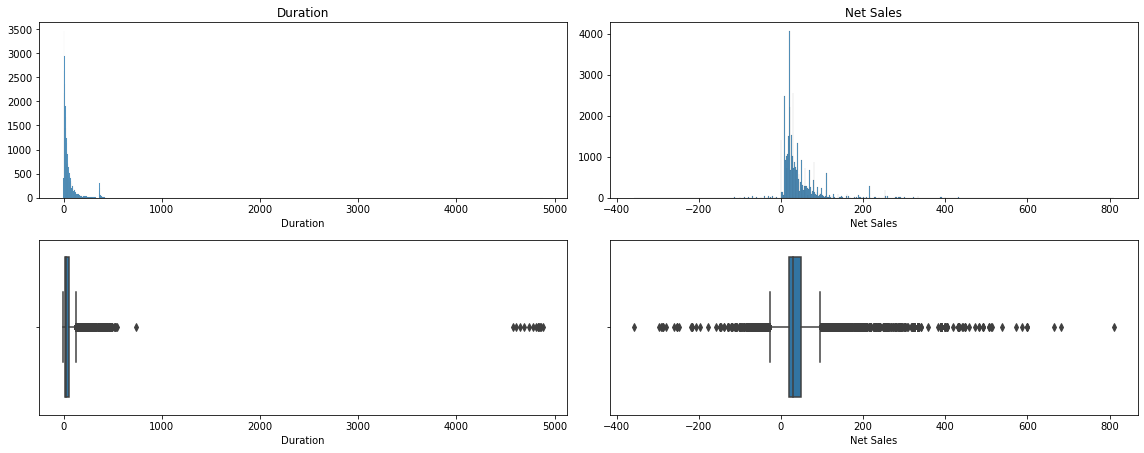

In [21]:
col_names = list(df.describe().columns)[0:2]
plt.figure(figsize=(16,12))
num_subplot = 1

for i in col_names:
    plt.subplot(4,2,num_subplot)

    
    sns.histplot(data=df, x=i)
    plt.title(i)
    plt.tight_layout()
    plt.ylabel(None)
    num_subplot+=1
    
for i in col_names:
    plt.subplot(4,2,num_subplot)

    
    sns.boxplot(data=df, x=i)
    plt.tight_layout()
    plt.ylabel(None)
    num_subplot+=1

Melihat Persebaran Data Commission dan Age

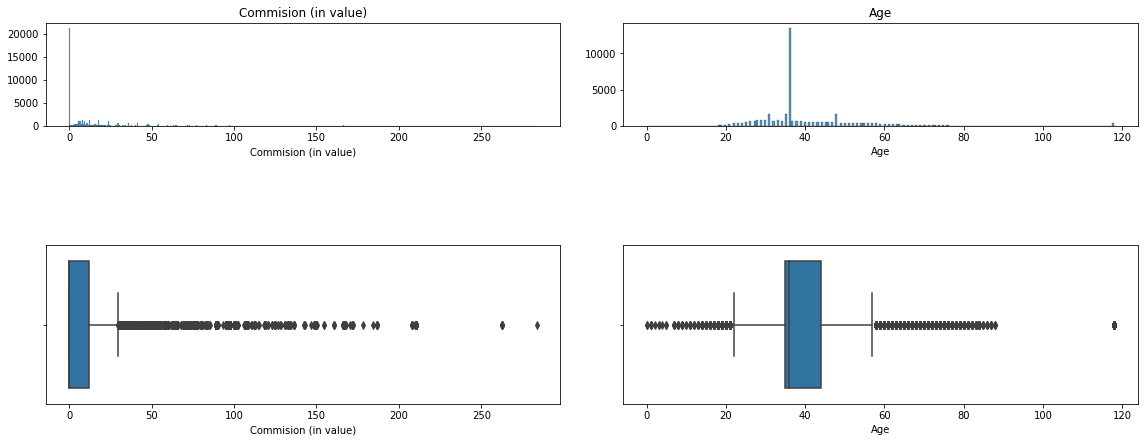

In [22]:
col_names = list(df.describe().columns)[2:4]
plt.figure(figsize=(16,12))
num_subplot = 1

for i in col_names:
    plt.subplot(6,2,num_subplot)
    
    sns.histplot(data=df, x=i)
    plt.title(i)
    plt.tight_layout()
    plt.ylabel(None)
    num_subplot+=1

for i in col_names:
    plt.subplot(4,2,num_subplot)

    sns.boxplot(data=df, x=i)
    plt.ylabel(None)
    num_subplot+=1

Penulis melihat terdapat banyak data outliers pada data set ini, selanjutnya akan dipelajari lebih lanjut mengenai apakah data tersebut diputuskan untuk dibuang atau tidak

In [23]:
# data sebelum pembuangan outliers
df.shape

(39324, 10)

In [24]:
# variabel 'outliers' berisikan data-data outliers yang hendak dibuang
outliers = df[(df['Age']>80)|(df['Commision (in value)']>100)|(df['Duration']>500)|(df['Net Sales']<-200)|(df['Net Sales']>215)]
outliers

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.00,54.00,57,0
11,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.00,54.00,27,0
13,C2B,Airlines,Online,Annual Silver Plan,376,SINGAPORE,252.85,63.21,43,1
50,LWC,Travel Agency,Online,Annual Travel Protect Gold,370,CHINA,204.60,132.99,39,1
53,C2B,Airlines,Online,Annual Silver Plan,366,SINGAPORE,216.00,54.00,37,0
...,...,...,...,...,...,...,...,...,...,...
39229,C2B,Airlines,Online,Annual Gold Plan,378,SINGAPORE,333.00,83.25,47,0
39235,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,216.00,54.00,38,0
39241,C2B,Airlines,Online,Annual Silver Plan,390,SINGAPORE,301.00,75.25,48,1
39277,C2B,Airlines,Online,Annual Gold Plan,370,SINGAPORE,333.00,83.25,40,0


Melihat proporsi data target

In [25]:
(df['Claim'].value_counts() / df['Claim'].value_counts().sum())*100

# dari sini kita dapat melihat bahwa proporsi data target (kategori 1 tidak sebanding dengan kategori 0) sebesar 1.711%
# atau data ini bisa disebut Moderate Imbalance (1-20% of the data set)

0    98.288577
1    1.711423 
Name: Claim, dtype: float64

In [26]:
# melihat proporsi target penulis tiap rentang Net Sales
prop_target_1 = pd.DataFrame({
    'rentang_NetSales':['>400', '301-400', '201-300', '101-200', '1-100', '<=0'],
    '%Target_1':[
        ((df[(df['Net Sales']>=400) & (df['Net Sales']<=df[['Net Sales']].describe().loc['max'][0])]['Claim'].value_counts() / df[(df['Net Sales']>=400) & (df['Net Sales']<=df[['Net Sales']].describe().loc['max'][0])]['Claim'].value_counts().sum())*100)[1],
        ((df[(df['Net Sales']>300) & (df['Net Sales']<=400)]['Claim'].value_counts()) / (df[(df['Net Sales']>300) & (df['Net Sales']<=400)]['Claim'].value_counts().sum())*100)[1],
        ((df[(df['Net Sales']>200) & (df['Net Sales']<=300)]['Claim'].value_counts() / df[(df['Net Sales']>200) & (df['Net Sales']<=300)]['Claim'].value_counts().sum())*100)[1],
        ((df[(df['Net Sales']>100) & (df['Net Sales']<=200)]['Claim'].value_counts() / df[(df['Net Sales']>100) & (df['Net Sales']<=200)]['Claim'].value_counts().sum())*100)[1],
        ((df[(df['Net Sales']>1) & (df['Net Sales']<=100)]['Claim'].value_counts() / df[(df['Net Sales']>1) & (df['Net Sales']<=100)]['Claim'].value_counts().sum())*100)[1],
        np.nan
    ]
})
prop_target_1

,rentang_NetSales,%Target_1
0,>400,7.692308
1,301-400,11.875000
2,201-300,12.760736
3,101-200,3.384279
4,1-100,1.399994
5,<=0,NaN


Dikarenakan penulis tidak puas dengan jumlah kolom yang tersedia, penulis memutuskan untuk melakukan binning sebagai upaya feature engineering

### Binning Net Sales

In [27]:
df.loc[df['Net Sales'].between(400, df[['Net Sales']].describe().loc['max'][0], 'right'), 'Net_Sales_bin'] = '>400'
df.loc[df['Net Sales'].between(300, 400, 'right'), 'Net_Sales_bin'] = '301-400'
df.loc[df['Net Sales'].between(200, 300, 'right'), 'Net_Sales_bin'] = '201-300'
df.loc[df['Net Sales'].between(100, 200, 'right'), 'Net_Sales_bin'] = '101-200'
df.loc[df['Net Sales'].between(0, 100, 'right'), 'Net_Sales_bin'] = '1-100'
df.loc[df['Net Sales'].between(df[['Net Sales']].describe().loc['min'][0], 0, 'both'), 'Net_Sales_bin'] = '<=0'

In [28]:
# berikut hasil setelah dilakukan binning net sales
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Net_Sales_bin
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0,201-300
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0,1-100
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0,1-100
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0,101-200
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0,1-100
...,...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1,1-100
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0,1-100
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0,1-100
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0,1-100


In [29]:
df.info()
# dipastikan tidak ada baris yang kosong atau data NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39324 entries, 0 to 39323
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39324 non-null  object 
 1   Agency Type           39324 non-null  object 
 2   Distribution Channel  39324 non-null  object 
 3   Product Name          39324 non-null  object 
 4   Duration              39324 non-null  int64  
 5   Destination           39324 non-null  object 
 6   Net Sales             39324 non-null  float64
 7   Commision (in value)  39324 non-null  float64
 8   Age                   39324 non-null  int64  
 9   Claim                 39324 non-null  int32  
 10  Net_Sales_bin         39324 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 3.2+ MB


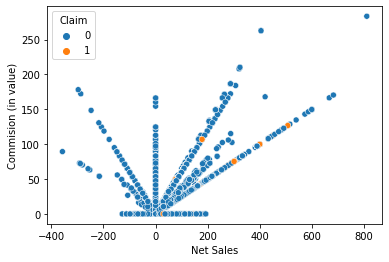

In [30]:
sns.scatterplot(data=df, x='Net Sales', y='Commision (in value)', hue='Claim');

Dari scatterplot diatas dapat terlihat nasabah yang melakukan claim berada pada rentang ketika net salesnya tinggi dan commision (in value) juga tinggi

In [31]:
df[df['Net Sales']<0].sample(10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Net_Sales_bin
36746,C2B,Airlines,Online,Annual Silver Plan,385,SINGAPORE,-259.2,64.80,52,0,<=0
34947,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,11,GERMANY,-19.8,11.88,38,0,<=0
21560,EPX,Travel Agency,Online,Cancellation Plan,25,CHINA,-25.0,0.00,36,0,<=0
6223,EPX,Travel Agency,Online,Cancellation Plan,15,CHINA,-53.0,0.00,36,0,<=0
38319,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,23,UNITED KINGDOM,-9.9,5.94,31,0,<=0
32115,EPX,Travel Agency,Online,1 way Comprehensive Plan,177,VIET NAM,-20.0,0.00,36,0,<=0
32255,EPX,Travel Agency,Online,2 way Comprehensive Plan,68,AUSTRALIA,-69.0,0.00,36,0,<=0
32881,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,UNITED KINGDOM,-29.7,17.82,31,0,<=0
32194,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,100,AUSTRALIA,-69.3,41.58,52,0,<=0
13687,EPX,Travel Agency,Online,Cancellation Plan,22,PERU,-57.0,0.00,39,0,<=0


namun pada net sales < 0, tidak terlihat proses claim dilakukan

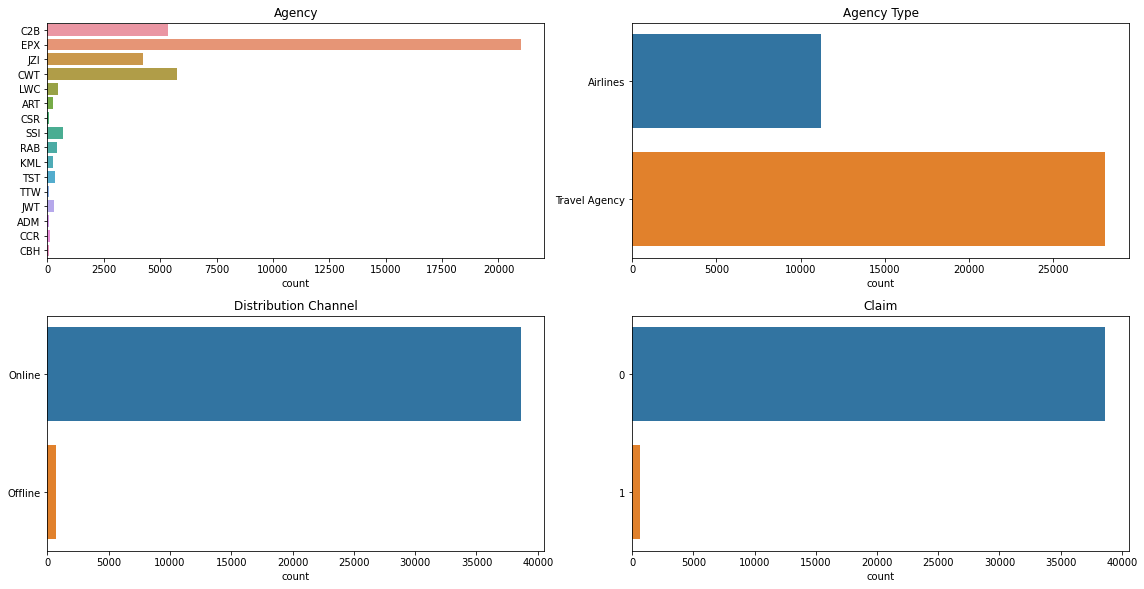

In [32]:
list_kolom = ['Agency', 'Agency Type', 'Distribution Channel', 'Claim']
plt.figure(figsize=(16,16))
num_subplot = 1

for i in list_kolom:
    plt.subplot(4,2,num_subplot)

    # plotting
    sns.countplot(data=df, y=i)
    plt.title(i)
    plt.tight_layout()
    plt.ylabel(None)
    num_subplot+=1

ternyata asuransi yang di claim lebih sedikit

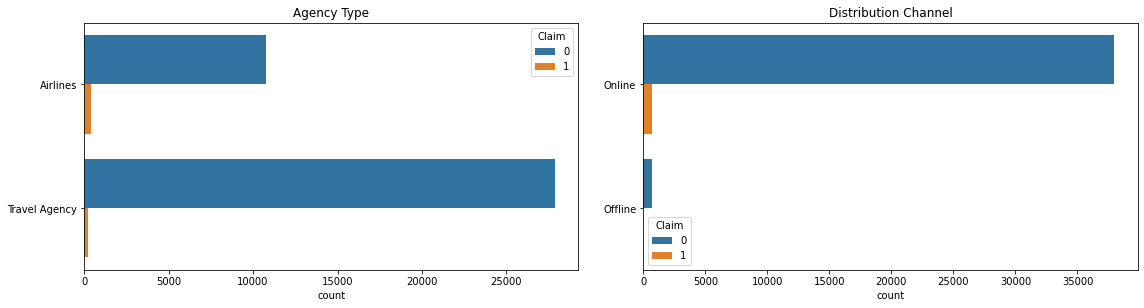

In [33]:
list_kolom = ['Agency Type', 'Distribution Channel']
plt.figure(figsize=(16,16))
num_subplot = 1

for i in list_kolom:
    plt.subplot(4,2,num_subplot)

    # plotting
    sns.countplot(data=df, y=i, hue='Claim')
    plt.title(i)
    plt.tight_layout()
    plt.ylabel(None)
    num_subplot+=1

pada barplot diatas penulis melihat bahwa Claim yang berhasil berada pada Tipe Agency airlines, travel agency, dan Online

In [34]:
# Berikut 5 Produk terlaris
top5_product_name = df['Product Name'].value_counts().to_frame().reset_index().rename(columns={'index':'Product Name', 'Product Name':'Jumlah'}).head()
top5_product_name

,Product Name,Jumlah
0,Cancellation Plan,11009
1,2 way Comprehensive Plan,8133
2,Rental Vehicle Excess Insurance,5726
3,Basic Plan,3638
4,Bronze Plan,2634


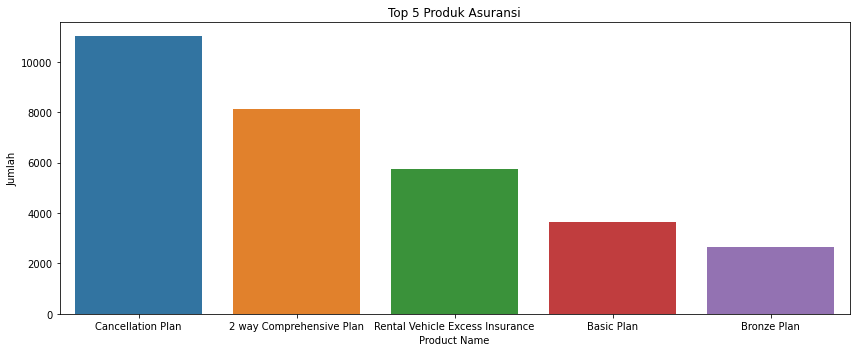

In [35]:
plt.figure(figsize=(12,5))
plt.title('Top 5 Produk Asuransi')
sns.barplot(data=top5_product_name, x='Product Name', y='Jumlah')
plt.tight_layout()

In [36]:
# Berikut 5 destinasi para nasabah
top5_destination = df['Destination'].value_counts().to_frame().reset_index().rename(columns={'index':'Destination', 'Destination':'Jumlah'}).head()
top5_destination

,Destination,Jumlah
0,SINGAPORE,8106
1,THAILAND,3659
2,MALAYSIA,3173
3,CHINA,2931
4,AUSTRALIA,2453


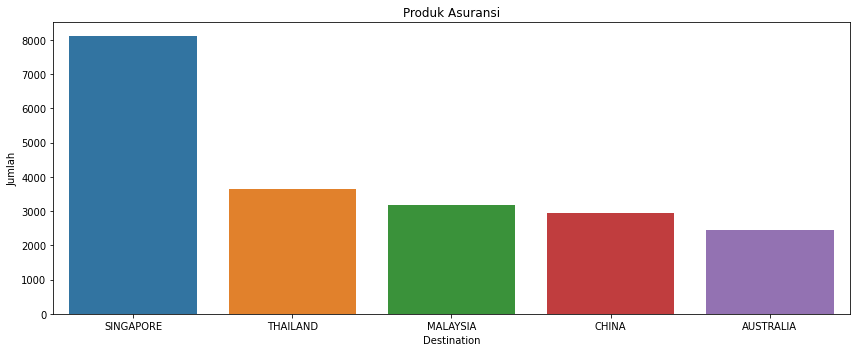

In [37]:
plt.figure(figsize=(12,5))
plt.title('Produk Asuransi')
sns.barplot(data=top5_destination, x='Destination', y='Jumlah')
plt.tight_layout()

Selanjutnya penulis merapikan tabel data frame agar mudah dibaca

In [38]:
df = df[['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age','Net_Sales_bin', 'Claim']]

In [39]:
# Berikut tampilan tabel terbaru
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Net_Sales_bin,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,201-300,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,1-100,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,1-100,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,101-200,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,1-100,0
...,...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1-100,1
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,1-100,0
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,1-100,0
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,1-100,0


In [40]:
df['Claim'].value_counts()

# Data set ini hanya menyimpan 673 target kelas 1

0    38651
1    673  
Name: Claim, dtype: int64

In [41]:
(df['Claim'].value_counts() / df['Claim'].value_counts().sum())*100

# dari sini kita dapat melihat bahwa proporsi data target (kategori 1 tidak sebanding dengan kategori 0) sebesar 1.711%
# atau data ini bisa disebut Moderate Imbalance (1-20% of the data set)

0    98.288577
1    1.711423 
Name: Claim, dtype: float64

In [42]:
len(df)

39324

In [43]:
prop_target_1

,rentang_NetSales,%Target_1
0,>400,7.692308
1,301-400,11.875000
2,201-300,12.760736
3,101-200,3.384279
4,1-100,1.399994
5,<=0,NaN


Dari EDA singkat ini penulis memutuskan untuk tidak melakukannya pembuangan Outliers dikarenakan hampir disetiap rentang outliers memuat informasi data target (kelas 1). Untuk data Net Sales dibawah 0 penulis tidak buang dikarenakan penulis ingin model untuk menangkap pola dimana jika suatu nasabah mendapatkan banyak potongan harga, maka claim asuransinya akan ditolak atau nasabah tidak mengajukan claim. Sebaliknya jika net sales lebih dari kelas 0 penulis ingin mesin untuk menangkap pola tersebut juga. Sehingga pada tahap ini hanya dilakukan feature engineering (binning) saja. Dikarenakan fitur yang tersedia sedikit penulis memutuskan menggunakan bantuan polynomial untuk menambah fitur-fitur tambahan hingga pangkat 2. Penulis juga memutuskan untuk melakukan resampling untuk mengatasi hal moderate imbalance data set ini.

# Pembuatan Machine Learning

## Data Splitting (Pemisahan / Pembagian Data)

In [44]:
# import traintest split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, fbeta_score, recall_score

In [45]:
# define X
X = df.drop(columns={'Claim', 'Net Sales'})
# define y
y = df['Claim']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=497, test_size=0.2, stratify=y)

In [46]:
y.value_counts()*100 / len(y)

0    98.288577
1    1.711423 
Name: Claim, dtype: float64

In [47]:
y.value_counts()

# dari sini kita dapat melihat bahwa proporsi data target (kategori 1 tidak sebanding dengan kategori 0) sebesar 1.711%
# atau data ini bisa disebut Moderate Imbalance (1-20% of the data set)

0    38651
1    673  
Name: Claim, dtype: int64

## Preprocessing
Encoder
- onehot = 'Agency Type', 'Distribution Channel', 'Net_Sales_bin'
- binary = 'Agency', 'Product Name', 'Destination'

In [48]:
# Preprocessing
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# Transform and Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

In [49]:
# Transformer columns
transformer_1 = ColumnTransformer([
    ('OneHotEncoder1', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel', 'Net_Sales_bin']),
    ('BinaryEncoder', BinaryEncoder(), ['Agency', 'Product Name', 'Destination'])
], remainder = 'passthrough')

transformer_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder1', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel',
                                  'Net_Sales_bin']),
                                ('BinaryEncoder', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination'])])

In [50]:
# karena y_train data target (kategori 1) lebih sedikit (imbalance), maka kita akan melakukan NearMiss dan SMOTE
y_train.value_counts()

0    30921
1    538  
Name: Claim, dtype: int64

## Modeling

In [51]:
# Import Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Import macam - macam model algoritma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Imbalance Treatment
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# import cross_val_score dan StratifiedKFold
from sklearn.model_selection import StratifiedKFold, cross_val_score

Dikarenakan feature yang tersedia dari data set sedikit, maka penulis memutuskan untuk melakukan polinomial pangkat 1-2

note: untuk pangkat 1 setara dengan tidak menggunakan polinomial sama sekali

In [52]:
list_poly = []
list_algo = []
list_mean_recall = []
list_std_recall = []
list_all_recall = []

# Define Scaler
scaler = RobustScaler()

# Define Algorithm
O_algorithm = [
    LogisticRegression(solver='liblinear'), 
    KNeighborsClassifier(n_neighbors=5), 
    DecisionTreeClassifier(max_depth=3, random_state=497),
    RandomForestClassifier(max_depth=3, random_state=497),
    AdaBoostClassifier(random_state=497),
    GradientBoostingClassifier(max_depth=3, random_state=497),
    XGBClassifier(),
    lgb.LGBMClassifier()
    ]

# Define fold
skfold = StratifiedKFold(n_splits=5)

# Polynomial
O_poly = [PolynomialFeatures(degree=1), PolynomialFeatures(degree=2)]

# Cross validation

for poly in O_poly:
    for algorithm in O_algorithm:
        model_cv = cross_val_score(estimator = Pipeline([
        ('transformer', transformer_1), 
        ('Scaler', scaler),
        ('poly', poly),
        ('Model', algorithm)]),
                    X = X_train,
                    y = y_train,
                    cv = skfold,
                    scoring = 'recall',
                    error_score='raise',
                    n_jobs=-1
        )

        list_poly.append(poly)
        list_algo.append(algorithm)
        list_mean_recall.append(model_cv.mean())
        list_std_recall.append(model_cv.std())
        list_all_recall.append(model_cv.round(4))

In [53]:
basic_algo_scaler = pd.DataFrame({
    'PolynomialDegree': list_poly,
    'Algorithm' : list_algo,
    'recall_score' : list_mean_recall,
    'Std' : list_std_recall,
    'data' : list_all_recall
})

In [54]:
basic_algo_scaler.sort_values('recall_score', ascending=False).head()

,PolynomialDegree,Algorithm,recall_score,Std,data
6,PolynomialFeatures(degree=1),"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, gamma=None,\n gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, n_estimators=100, n_jobs=None,\n num_parallel_tree=None, predictor=None, random_state=None,\n reg_alpha=None, reg_lambda=None, ...)",0.007442,0.009115,"[0.0187, 0.0185, 0.0, 0.0, 0.0]"
1,PolynomialFeatures(degree=1),KNeighborsClassifier(),0.003738,0.004578,"[0.0093, 0.0, 0.0, 0.0, 0.0093]"
14,PolynomialFeatures(),"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, gamma=None,\n gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, n_estimators=100, n_jobs=None,\n num_parallel_tree=None, predictor=None, random_state=None,\n reg_alpha=None, reg_lambda=None, ...)",0.003721,0.004557,"[0.0093, 0.0093, 0.0, 0.0, 0.0]"
15,PolynomialFeatures(),LGBMClassifier(),0.003721,0.004557,"[0.0093, 0.0093, 0.0, 0.0, 0.0]"
9,PolynomialFeatures(),KNeighborsClassifier(),0.001869,0.003738,"[0.0, 0.0, 0.0, 0.0, 0.0093]"


dapat dilihat dari hasil tersebut jika tidak dilakukan resampling maka hasilnya sangat tidak bagus dikarenakan data moderate imbalance pada data target sebesar 1.710%

In [90]:
y_train.value_counts()*100 / len(y_train)

0    98.289838
1    1.710162 
Name: Claim, dtype: float64

In [93]:
y_train.value_counts()

# dari sini kita dapat melihat bahwa proporsi data target (kategori 1 tidak sebanding dengan kategori 0) sebesar 1.710%
# atau data ini bisa disebut Moderate Imbalance (1-20% of the data set)

0    30921
1    538  
Name: Claim, dtype: int64

### Menggunakan Resampler

Selanjutnya penulis melakukan resampling pada data set dengan menggunakan `NearMiss` dan `SMOTE`, untuk NearMiss menggunakan konsep dimana resampler tersebut akan men-sampling kelas mayoritas / yang banyak menjadi sedikit dengan memilih data yang tidak jauh dari data kelas minoritas / sedikit sehingga jumlah kelas mayoritas setara dengan minoritas. Berbeda dengan SMOTE, konsepnya resampler SMOTE mensintetis data kelas minoritas menjadi sebanyak kelas mayoritas namun kemiripan antar data minoritas tergantung dari parameter yang ditentukan

1. SMOTE

SMOTE atau dikenal dengan *Synthetic Minority Over-sampling Technique* dimana data minoritas (yang sedikit) dibuat secara sintetik yang  dibuat tidak jauh dari persebaran kelas tersebut berada (dapat ditentukan kemiripan dengan K-tetangga terdekat) sebanyak data mayoritas

<img src='SMOTE.png'>

2. NearMiss

NearMiss bekerja dengan mengurangi data mayoritas sehingga jumlahnya setara dengan data minoritas, namun kita dapat memilih data yang ingin disimpan (*keep*) sejauh apa dari data minoritas (parameter n neighbour)

<img src='NearMiss.png'>

In [55]:
list_sampler = []
list_poly = []
list_algo = []
list_mean_recall = []
list_std_recall = []
list_all_recall = []

# Define Scaler
scaler = RobustScaler()

# Define Algorithm
O_algorithm = [
    LogisticRegression(solver='liblinear'), 
    KNeighborsClassifier(n_neighbors=5), 
    DecisionTreeClassifier(max_depth=3, random_state=497),
    RandomForestClassifier(max_depth=3, random_state=497),
    AdaBoostClassifier(random_state=497),
    GradientBoostingClassifier(max_depth=3, random_state=497),
    XGBClassifier(random_state=497),
    lgb.LGBMClassifier(random_state=497)
    ]

# Define resampler 
O_resampler = [SMOTE(random_state=497), NearMiss(sampling_strategy='majority')]

# Define fold
skfold = StratifiedKFold(n_splits=5)

# Polynomial
O_poly = [PolynomialFeatures(degree=1), PolynomialFeatures(degree=2)]

# Cross validation

for resampler in O_resampler:
    for poly in O_poly:
        for algorithm in O_algorithm:
            model_cv = cross_val_score(estimator = Pipeline([
            ('transformer', transformer_1),
            ('resampler', resampler), 
            ('Scaler', scaler),
            ('poly', poly),
            ('Model', algorithm)]),
                        X = X_train,
                        y = y_train,
                        cv = skfold,
                        scoring = 'recall',
                        error_score='raise',
                        n_jobs=-1
            )

            list_sampler.append(resampler)
            list_poly.append(poly)
            list_algo.append(algorithm)
            list_mean_recall.append(model_cv.mean())
            list_std_recall.append(model_cv.std())
            list_all_recall.append(model_cv.round(4))

# 14m 33s

In [56]:
sampled_basic_algo_scaler = pd.DataFrame({
    'Resampler':list_sampler,
    'PolynomialDegree': list_poly,
    'Algorithm' : list_algo,
    'recall_score' : list_mean_recall,
    'Std' : list_std_recall,
    'data' : list_all_recall
})

In [57]:
sampled_basic_algo_scaler.sort_values('recall_score', ascending=False).head(3)

,Resampler,PolynomialDegree,Algorithm,recall_score,Std,data
22,NearMiss(sampling_strategy='majority'),PolynomialFeatures(degree=1),"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, gamma=None,\n gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, n_estimators=100, n_jobs=None,\n num_parallel_tree=None, predictor=None, random_state=497,\n reg_alpha=None, reg_lambda=None, ...)",0.905192,0.019865,"[0.9159, 0.8796, 0.9352, 0.9074, 0.8879]"
30,NearMiss(sampling_strategy='majority'),PolynomialFeatures(),"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, gamma=None,\n gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, n_estimators=100, n_jobs=None,\n num_parallel_tree=None, predictor=None, random_state=497,\n reg_alpha=None, reg_lambda=None, ...)",0.901454,0.019283,"[0.9065, 0.8981, 0.9352, 0.8889, 0.8785]"
23,NearMiss(sampling_strategy='majority'),PolynomialFeatures(degree=1),LGBMClassifier(random_state=497),0.899637,0.014802,"[0.9159, 0.8796, 0.9167, 0.8981, 0.8879]"


Dari sini terlihat bahwa model mengalami peningkatan nilai recall dikarenakan dilakukannya resampling pada data set, sehingga model tidak terlalu mempelajari kelas 0 dikarenakan kelas 0 menjadi majority class

Memilih Model Benchmark Terbaik untuk selanjutnya di `Predict ke Test Set`

> Model Terpilih: XGBClassifier() `tanpa polynomial` dan `resampler NearMiss` dengan recall score 0.905192 dan standar deviasi 0.019865

## XGBoost Classifier

Dalam Gradient Boosting, setiap prediktor mencoba meningkatkan prediksi sebelumnya dengan mengurangi kesalahan. Tetapi hal unik pada Gradient Boosting adalah ketimbang memasang prediktor pada data pada setiap iterasi, namun prediktor yang baru meminimalisir kesalahan residual yang dibuat oleh prediktor sebelumnya. ([Vagiv Aliyef, 2020](https://towardsdatascience.com/gradient-boosting-classification-explained-through-python-60cc980eeb3d))

Terdapat 3 komponen utama pada XGBoost ini yaitu *Loss Function*, *Weak Learner*, dan *Aditive Model*. Dimana model XGBoost ini akan menambahkan *Aditive Model* beberapa *weak learner*, lalu yang nantinya akan mempelajari kesalahan prediktor sebelumnya hingga *loss function* menjadi kecil. ([Vihar Kurama, 2019](https://blog.paperspace.com/gradient-boosting-for-classification/))



## Predict Test Set

XGBClassifier() dengan resampler NearMiss

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [94]:
# define X
X = df.drop(columns={'Claim', 'Net Sales'})
# define y
y = df['Claim']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=497, test_size=0.2, stratify=y)

# kolom transformer
transformer_1

# Define resampler 
resampler = NearMiss(sampling_strategy='majority')
# resampler = NearMiss(sampling_strategy='majority', n_neighbors=9) # terbaik 0.9704

# Define Scaler
scaler = RobustScaler()

# define model benchmark (logreg)
XGboost_awal = XGBClassifier(random_state=497)

model_benchmark_1 = Pipeline([
        ('transform', transformer_1),
        ('resampler', resampler),
        ('scaler', scaler),
        ('model', XGboost_awal)    
])
model_benchmark_1.fit(X_train, y_train)

y_pred_1 = model_benchmark_1.predict(X_test)
print('prediksi recall score Benchmark model pada test set :', recall_score(y_test, y_pred_1))

prediksi recall score Benchmark model pada test set : 0.9481481481481482


In [60]:
# berikut classification reportnya
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.99      0.18      0.30      7730
           1       0.02      0.95      0.04       135

    accuracy                           0.19      7865
   macro avg       0.51      0.56      0.17      7865
weighted avg       0.98      0.19      0.30      7865



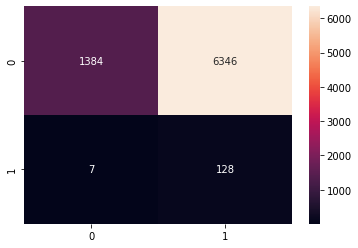

In [61]:
# berikut gambaran confusion matrixnya
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True, fmt='.4g');

## Hyperparameter Tuning
XGBClassifier() dengan resampler NearMiss dengan Random yang pertama atau ke-1

In [62]:
# Define resampler 
resampler = NearMiss(sampling_strategy='majority')
list_n_neighbors = list(np.arange(1,11,1))

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# kedalaman pohon
max_depth = list(np.arange(1,11))

# learning rate
learning_rate = list(np.arange(0.01, 1.0, 0.01))

# jumlah pohon
n_estimators = list(np.arange(100,201))

# jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2, 1.0, 0.1))

# gamma (min_impurity_decrease)
gamma = list(np.arange(1,11))

# jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0.1, 1.0, 0.2))

# alpha (regularization)
reg_alpha = list(np.logspace(-3,3,7))

# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'balancing__n_neighbors':list_n_neighbors,
    'model__max_depth':max_depth, 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__reg_alpha': reg_alpha
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [64]:
# Benchmark model
xgbc = XGBClassifier(random_state=497)

# Create the algorithm chains
estimator_xgbc = Pipeline([
        ('tansformer', transformer_1),
        ('balancing', resampler), 
        ('model', xgbc)
        ])

# 1
random_xgbc = RandomizedSearchCV(
    estimator= estimator_xgbc, 
    param_distributions= hyperparam_space_xgbc, 
    cv= skf, 
    scoring= 'recall', 
    random_state= 497,
    n_iter=30,
    n_jobs= -1
)

In [65]:
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoder1',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel',
                                                                                'Net_Sales_bin']),
                                                                              ('BinaryEncoder',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destinat...
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001, 0.01, 0.1,
                                                             1.0, 10.0, 100.0,
                                                             1000.0],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001]},
                   random_state=497, scoring='recall')

In [66]:
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_balancing__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,1.587936,0.114279,0.139796,0.052963,0.5,0.1,144,4,0.79,2,8,"{'model__subsample': 0.5000000000000001, 'model__reg_alpha': 0.1, 'model__n_estimators': 144, 'model__max_depth': 4, 'model__learning_rate': 0.79, 'model__gamma': 2, 'balancing__n_neighbors': 8}",0.962617,0.944444,0.935185,0.944444,0.943925,0.946123,0.008968,1
29,1.161468,0.080556,0.083846,0.019434,0.8,0.01,134,6,0.93,1,10,"{'model__subsample': 0.8000000000000003, 'model__reg_alpha': 0.01, 'model__n_estimators': 134, 'model__max_depth': 6, 'model__learning_rate': 0.93, 'model__gamma': 1, 'balancing__n_neighbors': 10}",0.962617,0.935185,0.953704,0.944444,0.934579,0.946106,0.010819,2
7,1.207558,0.021671,0.111408,0.019953,0.4,1.0,133,10,0.86,4,7,"{'model__subsample': 0.4000000000000001, 'model__reg_alpha': 1.0, 'model__n_estimators': 133, 'model__max_depth': 10, 'model__learning_rate': 0.86, 'model__gamma': 4, 'balancing__n_neighbors': 7}",0.934579,0.925926,0.953704,0.935185,0.934579,0.936795,0.009126,3


{'model__subsample': 0.5000000000000001,
 'model__reg_alpha': 0.1,
 'model__n_estimators': 144,
 'model__max_depth': 4,
 'model__learning_rate': 0.79,
 'model__gamma': 2,
 'balancing__n_neighbors': 8}
`0.946123	0.008968`

In [67]:
random_xgbc.best_params_

{'model__subsample': 0.5000000000000001,
 'model__reg_alpha': 0.1,
 'model__n_estimators': 144,
 'model__max_depth': 4,
 'model__learning_rate': 0.79,
 'model__gamma': 2,
 'balancing__n_neighbors': 8}

Dari RandomSearchCV pertama terlihat bahwa recall dari:
- XGBC `benchmark model` : 0.905192	std : 0.019865
- XGBC `setelah tuning#1`: 0.946123	std : 0.008968	

Selanjutnya penulis melakukan RandomSearchCV yang ke-2 kalinya

untuk parameter akan dipersempit
> penulis sebelumnya sudah mencoba menggunakan GridSearchCV namun hasilnya laptop menjadi blackscreen dan memnutuskan untuk melanjutkan menggunakan RandomSearchCV

In [68]:
# Benchmark model
xgbc = XGBClassifier(random_state=497)

resampler = NearMiss(sampling_strategy='majority', n_neighbors=9)

# Create the algorithm chains
estimator_xgbc = Pipeline([
        ('tansformer', transformer_1),
        ('balancing', resampler), 
        ('model', xgbc)
        ])

# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'model__max_depth':[5, 6, 7], 
    'model__learning_rate':[0.79, 0.87, 0.99],
    'model__n_estimators':[146, 148, 150],
    'model__subsample':[0.5, 0.6],
    'model__gamma': [4, 5],
    'model__reg_alpha': [0.01, 0.1,]
}

# Hyperparameter tuning
random_xgbc_2 = RandomizedSearchCV(
    estimator= estimator_xgbc, 
    param_distributions= hyperparam_space_xgbc, 
    cv= skf, 
    scoring= 'recall', 
    random_state= 497,
    n_iter=200,
    n_jobs= -1
)

In [69]:
random_xgbc_2.fit(X_train, y_train)

# 2m 43s

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoder1',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel',
                                                                                'Net_Sales_bin']),
                                                                              ('BinaryEncoder',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destinat...
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=497,
                                                            reg_alpha=None,
                                                            reg_lambda=None, ...))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__gamma': [4, 5],
                                        'model__learning_rate': [0.79, 0.87,
                                                                 0.99],
                                        'model__max_depth': [5, 6, 7],
                                        'model__n_estimators': [146, 148, 150],
                                        'model__reg_alpha': [0.01, 0.1],
                                        'model__subsample': [0.5, 0.6]},
                   random_state=497, scoring='recall')

In [70]:
pd.DataFrame(random_xgbc_2.cv_results_).sort_values(by='rank_test_score').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,1.168618,0.055974,0.131014,0.036093,0.5,0.1,146,5,0.87,4,"{'model__subsample': 0.5, 'model__reg_alpha': 0.1, 'model__n_estimators': 146, 'model__max_depth': 5, 'model__learning_rate': 0.87, 'model__gamma': 4}",0.981308,0.944444,0.962963,0.935185,0.953271,0.955434,0.015885,1


In [71]:
print('XGBoost')
print('Best_score:', random_xgbc_2.best_score_)
print('Best_params:', random_xgbc_2.best_params_)

XGBoost
Best_score: 0.9554344063689857
Best_params: {'model__subsample': 0.5, 'model__reg_alpha': 0.1, 'model__n_estimators': 146, 'model__max_depth': 5, 'model__learning_rate': 0.87, 'model__gamma': 4}


Dari RandomSearchCV kedua terlihat bahwa recall dari:
- XGBC `benchmark model` : 0.905192	std : 0.019865
- XGBC setelah tuning`#1`: 0.946123	std : 0.008968
- XGBC setelah tuning`#2`: 0.955434	std : 0.015885

## Predict Ke Test Set
hasil dari RandomSearchCV yang ke-2

In [96]:
# best model
xgbc_tuning = random_xgbc_2.best_estimator_

# fitting
xgbc_tuning.fit(X_train, y_train)

# predict
y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

# recall score
recall_score_xgbc_tuning = recall_score(y_test, y_pred_xgbc_tuning)
print('prediksi recall score Setelah Tuning model pada test set :', recall_score_xgbc_tuning)

prediksi recall score Setelah Tuning model pada test set : 0.9703703703703703


In [73]:
print(classification_report(y_test, y_pred_xgbc_tuning))

              precision    recall  f1-score   support

           0       0.99      0.09      0.17      7730
           1       0.02      0.97      0.04       135

    accuracy                           0.11      7865
   macro avg       0.51      0.53      0.10      7865
weighted avg       0.98      0.11      0.17      7865



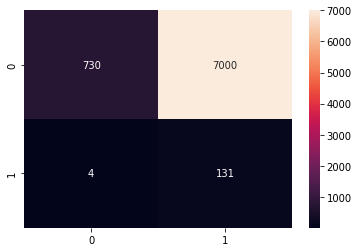

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='.4g');

## Saving Final Model
with Pickle

In [76]:
# save pickle
import pickle

# best model
xgbc_tuning = random_xgbc_2.best_estimator_

# fitting
xgbc_tuning.fit(X, y)

# save dengan pickle
pickle.dump(xgbc_tuning, open('best_xgbc_capstone.sav', 'wb'))

# Melihat Feature Importance

pembuatan data frame fitur-fitur yang berpengaruh

In [77]:
X_explainer = df.drop(columns={'Claim', 'Net Sales'}).copy()
X_explainer = transformer_1.fit_transform(X_explainer)

In [78]:
X_explainer

array([[  0.  ,   1.  ,   0.  , ..., 365.  ,  54.  ,  57.  ],
       [  1.  ,   1.  ,   0.  , ...,   4.  ,   0.  ,  33.  ],
       [  0.  ,   1.  ,   0.  , ...,  19.  ,   7.7 ,  26.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  64.  ,  10.5 ,  50.  ],
       [  1.  ,   1.  ,   0.  , ...,  51.  ,   0.  ,  36.  ],
       [  1.  ,   1.  ,   0.  , ..., 172.  ,  17.82,  31.  ]])

In [79]:
transformer_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder1', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel',
                                  'Net_Sales_bin']),
                                ('BinaryEncoder', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination'])])

In [121]:
# mengambil nama-nama kolom pada pipeline OneHot Encoding
p = transformer_1.transformers_[0][1].get_feature_names_out().tolist()

In [122]:
# mengambil nama-nama kolom pada pipeline Binary Encoding
q = transformer_1.transformers_[1][1].get_feature_names()

In [123]:
# mengambil nama-nama kolom pada pipeline yang remainder passthrough / yang tidak di encode
r = X.columns[transformer_1.transformers_[2][2]].tolist()

In [124]:
# menyatukan semua dalam bentuk list
kolom_explainer = p+q+r

In [84]:
# selanjutnya dibuat menjadi sebuah data frame
df_X_explainer = pd.DataFrame(X_explainer, columns=kolom_explainer)
df_X_explainer

,Agency Type_Travel Agency,Distribution Channel_Online,Net_Sales_bin_101-200,Net_Sales_bin_201-300,Net_Sales_bin_301-400,Net_Sales_bin_<=0,Net_Sales_bin_>400,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Duration,Commision (in value),Age
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,365.0,54.00,57.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.00,33.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.0,7.70,26.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,0.00,59.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,4.00,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39319,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,14.0,0.00,36.0
39320,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,17.0,47.52,47.0
39321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,64.0,10.50,50.0
39322,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,51.0,0.00,36.0


### Plot Feature Importance

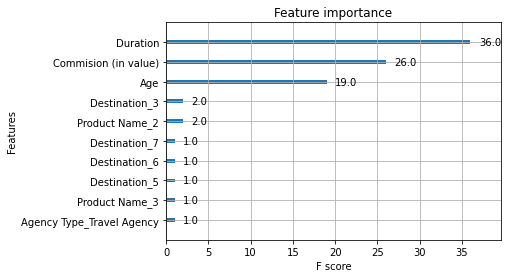

In [85]:
# plotting fitur-fitur yang berpengaruh
from xgboost import plot_importance

plot_importance(xgbc_tuning[2]).set_yticklabels([kolom_explainer[0], kolom_explainer[15], kolom_explainer[22], kolom_explainer[23], kolom_explainer[24], kolom_explainer[14], kolom_explainer[20], kolom_explainer[27], kolom_explainer[26], kolom_explainer[25]])
plt.show()

dari grafik dapat kita simpulkan bahwa semakin besar nilai F score suatu nasabah, maka semakin besar pula nasabah tersebut diprediksi menjadi kelas 1 atau Claim

In [86]:
# berikut fitur-fitur berpengaruh juga namun dari library lime dan module lime_tabular
import lime
from lime import lime_tabular

# load final model Classifier
model = pickle.load(open('best_xgbc_capstone.sav', 'rb'))
model.fit(X, y)

Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder1',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Net_Sales_bin']),
                                                 ('BinaryEncoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('balancing',
                 NearMiss(n_neighbors=9, sampling_strategy='majority')),
                ('model',
                 XGBClassifie...
                               gamma=4, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.87, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=146, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=497,
                               reg_alpha=0.1, reg_lambda=1, ...))])

In [107]:
# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(df_X_explainer),
    feature_names=df_X_explainer.columns,
    class_names=['Not Claim', 'Claim'],
    mode='classification'
)

In [120]:
# Mari kita bandingkan data tiap nasabah dengan mengganti index nasabah
print(f"Prediksi calon nasabah akan: {('Claim' if y[1243] == 1 else 'Tidak Claim')}") # [index nasabah]

exp = explainer.explain_instance(
    data_row=df_X_explainer.iloc[1243], # [index nasabah]
    predict_fn=model[2].predict_proba
)

exp.show_in_notebook(show_table=True)

Prediksi calon nasabah akan: Tidak Claim


In [131]:
print(f"Prediksi calon nasabah akan: {('Claim' if y[39241] == 1 else 'Tidak Claim')}") # [index nasabah]

exp = explainer.explain_instance(
    data_row=df_X_explainer.iloc[39241], # [index nasabah]
    predict_fn=model[2].predict_proba
)

exp.show_in_notebook(show_table=True)

Prediksi calon nasabah akan: Claim


dari contoh nasabah index 1243 bahwa nasabah tersebut durasi perjalanannya sebentar, dikarenakan pada grafik xgboost importance bobot dari durasi perjalanan memiliki bobot paling tinggi, maka mesin memprediksi bahwa nasabah dengan index 1243 tidak akan melakukan Claim dan dinyatakan benar pada data.

Sedangkan nasabah pada index 39241 bahwa nasabah tersebut yang aktualnya melakukan claim diprediksi melakukan claim dikarenakan faktor pada jumlah komisi yang besar, durasi perjalanan besar, dan serta berumur tua

## Membandingkan Hasil Sebelum Tuning (Benchmark) dan Setelah Tuning
dari setelah dilakukannya prediksi ke test set

In [ ]:
print('prediksi recall score Benchmark model pada test set :', recall_score(y_test, y_pred_1))
print('prediksi recall score Setelah Tuning model pada test set :', recall_score_xgbc_tuning)

prediksi recall score Benchmark model pada test set : 0.9481481481481482
prediksi recall score Setelah Tuning model pada test set : 0.9703703703703703


''

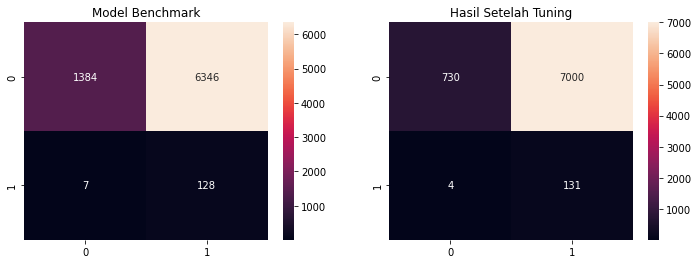

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Model Benchmark')
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True, fmt='.4g')
plt.subplot(1,2,2)
plt.title('Hasil Setelah Tuning')
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='.4g')
;

Kembali lagi terlihat bahwa model XGBC setelah kita tuning hyperparameternya memiliki FN yang lebih sedikit walaupun hanya berbeda sedikit saja. Oleh karena itu kita akan menggunakan model XGBC setelah tuning sebagai model akhir. Selanjutnya penulis akan melakukan membahas mengenai classification report dari XGBC Setelah Tuning

## Kesimpulan dan Solusi Bisnis

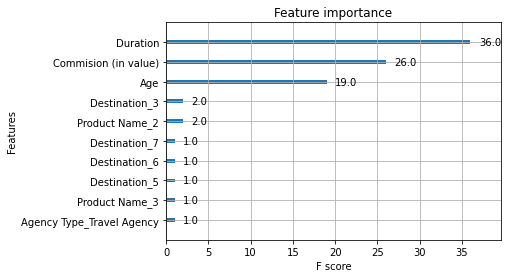

In [137]:
# Fitur paling berpengaruh
xgbc_tuning = random_xgbc_2.best_estimator_
xgbc_tuning.fit(X, y)
plot_importance(xgbc_tuning[2]).set_yticklabels([kolom_explainer[0], kolom_explainer[15], kolom_explainer[22], kolom_explainer[23], kolom_explainer[24], kolom_explainer[14], kolom_explainer[20], kolom_explainer[27], kolom_explainer[26], kolom_explainer[25]])
plt.show()

Tiga fitur teratas yang berpengaruh untuk menentukan kelas 1 dan 0 adalah 
- `Duration` atau durasi perjalanan
- `Commision(in value)` atau komisi yang diberikan kepada agen asuransi
- `Age` atau umur

In [133]:
print('Classification Report XGBC setelah tuning : \n', classification_report(y_test, y_pred_xgbc_tuning))

Classification Report XGBC setelah tuning : 
               precision    recall  f1-score   support

           0       0.99      0.09      0.17      7730
           1       0.02      0.97      0.04       135

    accuracy                           0.11      7865
   macro avg       0.51      0.53      0.10      7865
weighted avg       0.98      0.11      0.17      7865



### Kesimpulan

Berdasarkan hasil classification report, penulis dapat menyimpulkan bahwa kesimpulan bila seandainya nanti penulis menggunakan model ini untuk memprediksi calon nasabah yang akan melakukan Claim, maka penulis menyarankan untuk melakukan pembebanan berlebih yang dapat dilihat dari feature importance yaitu `durasi perjalanan`, `jumlah komisi`, dan `umur` dari calon nasabah. Semakin besar nilai fitur tersebut maka kemungkinan dari nasabah melakukan Claim akan semakin besar. Hal ini dapat meminimalisir kerugian yang diterima perusahaan dan bahkan masih mendapatkan keuntungan setelah melakukan Claim. Adapun model ini memiliki nilai recall yang cukup tinggi sebesar 97% dimana model dapat memprediksi calon nasabah yang akan melakukan Claim.

''

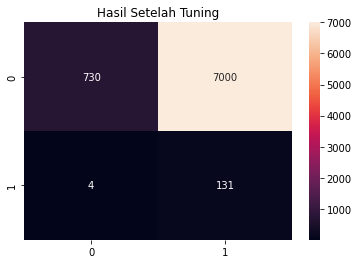

In [138]:
plt.title('Hasil Setelah Tuning')
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='.4g')
;

Adapun dampak dari pembesaran nilai recall adalah terdapat banyak False Positife (FP, calon nasabah yang aktualnya tidak melakukan Claim namun diprediksi akan melakukan Claim). Untuk mensiasati ini model bisnis perusahaan asuransi dirubah yang awalnya mengalokasikan dana untuk 50% nasabah untuk diberi diskon dan 50% nasabah diberikan harga standar. Menjadi jika suatu calon nasabah diprediksi tidak akan melakukan claim maka pihak asuransi memberi harga potongan dan jika suatu calon nasabah diprediksi akan melakukan claim maka diberikan biaya berlebih dimana beban yang diberikan tergantung dari fitur penting yang ada pada model XGBC ini.

Bila seandainya biaya pembebanan premi bersumber dari [Forbes](https://www.forbes.com/advisor/travel-insurance/average-travel-insurance-cost/#:~:text=The%20average%20cost%20of%20travel,a%20policy%20with%20generous%20coverage%20.) dimana biaya polis berkisar antara $154 hingga $437 dimana rata-ratanya di $228 dan pencairan claim berkisar 2x lipatnya premi awal. Dan andaikan jumlah calon nasabah yang kita miliki untuk suatu kurun waktu sebanyak 200 orang, maka hitungannya kurang lebih akan seperti ini :

`Tanpa model` (setengah calon nasabah diberikan potongan, setengah diberi premi normal dan 10% total nasabah melakukan claim):
- Premi yang diterima perusahaan = 100 x $154 + 100 x $228 = $15,400 + $22,800 = $38,200
- Nasabah melakukan claim = 20 x $456 = $9,120
- Pendapatan bersih perusahaan = $38,200 - $9,120 = `$29,080`

`Dengan model` (10% calon nasabah diberikan potongan (diprediksi tidak akan claim), 90% diberi premi normal dan pembebanan terhadap fitur tertentu (anggap saja penambahan 5% dari premi) dan setengah total nasabah melakukan claim:
- Premi yang diterima perusahaan :
    - Total nasabah yang tidak melakukan claim = 10 x $154 = $1,540 
    - Total nasabah yang diprediksi akan melakukan claim = 190 x ($228 + (5% x $228)) = 190 x $239.4 = $45,486
- Total nasabah yang melakukan claim = 4 x $456 = $1,824 
- Pendapatan bersih perusahaan = $1,540 + $45,486 - $1,824 = `$45,202`

Berdasarkan contoh perhitungan tersebut, terlihat bahwa dengan menggunakan model, maka perusahaan dapat `meningkatkan pendapatan sebesar 55,44%`

### Rekomendasi

Adapun yang dapat direkomendasi oleh penulis untuk kedepannya:
- Diperlukannya fitur-fitur tambahan atau kolom seperti harga premi asuransi. Untuk menetukan suatu harga premi asuransi perjalanan diperlukan biaya perjalanan itu sendiri. Sehingga bisa memverifikasi kolom Net sales yang bertanda negatif, dikarenakan ada Net sales yang negatif namun Commision (in value)nya 0.
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali serta mencoba teknik resampler lainnya.
- Mencoba pendekatan bisnis lainnya dengan menggunakan metrik lain

# Sekian dan Terima Kasih